##  Animal Pose Estimation

### 1. Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Load images

#### Import Libraries

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import zipfile
import os
import numpy as np
import random
import matplotlib.image as mpimg


#### Load *path* to extract zip images

In [3]:
zip_path = '/content/drive/MyDrive/PROJETO 10/images/images.zip'
extract_path = '/content/images'

In [4]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

annotations_path = os.path.join(extract_path, 'annotations')
images_path = os.path.join(extract_path, 'images')

#### Annotations path

In [5]:
annotations_path = '/content/images/annotations'
annotations_file = '/content/images/annotations/keypoints.json'
images_path = '/content/images/images'
output_path = '/content/images/output'

### 3. Exploratory Analysis



##### Auxiliary Functions

In [6]:
def load_annotations(annotations_path):
    for filename in os.listdir(annotations_path):
        if filename.endswith('.json'):
            filepath = os.path.join(annotations_path, filename)
            with open(filepath) as f:
                data = json.load(f)
                return data

def save_bovine_images(images_path, bovine_images, output_path):
    os.makedirs(output_path, exist_ok=True)
    for image_id, image_filename in bovine_images.items():
        image_filepath = os.path.join(images_path, image_filename)
        if os.path.exists(image_filepath):
            image = Image.open(image_filepath)
            output_filepath = os.path.join(output_path, image_filename)
            image.save(output_filepath)
        else:
            print(f"Imagem não encontrada: {image_filepath}")

#### 3.1 Mapper bovine category

In [7]:
annotations_data = load_annotations(annotations_path)
annotations = annotations_data['annotations']
categories = annotations_data['categories']
images_info = annotations_data['images']

category_map = {cat['id']: cat['name'] for cat in categories}

animal_counts = {}
for annotation in annotations:
    animal_type = category_map[annotation['category_id']]
    if animal_type not in animal_counts:
        animal_counts[animal_type] = 0
    animal_counts[animal_type] += 1

##### Image distribuition per category

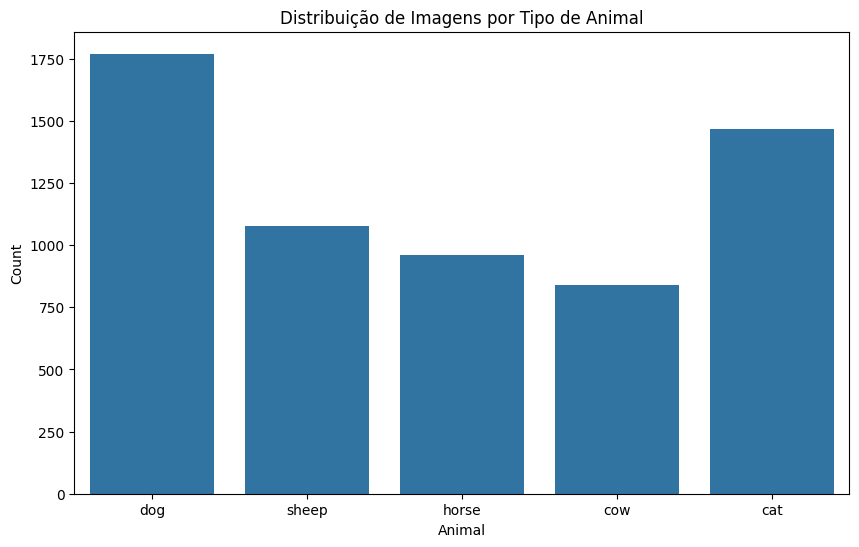

In [8]:
animal_counts_df = pd.DataFrame(list(animal_counts.items()), columns=['Animal', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Animal', y='Count', data=animal_counts_df)
plt.title('Distribuição de Imagens por Tipo de Animal')
plt.show()

##### Total number of bovines

In [9]:
bovine_image_ids = {str(ann['image_id']): images_info[str(ann['image_id'])] for ann in annotations if category_map[ann['category_id']] == 'cow'}
print(f"Total number of bovines (cow): {len(bovine_image_ids)}")

Total number of bovines (cow): 534


###### Save into folder

In [10]:
def save_bovine_images(images_path, bovine_images, output_path):
    os.makedirs(output_path, exist_ok=True)
    for image_id, image_filename in bovine_images.items():
        image_filepath = os.path.join(images_path, image_filename)
        if os.path.exists(image_filepath):
            image = Image.open(image_filepath)
            output_filepath = os.path.join(output_path, image_filename)
            image.save(output_filepath)
        else:
            print(f"Imagem não encontrada: {image_filepath}")

save_bovine_images(images_path, bovine_image_ids, output_path)

print("Imagens de vacas:")
for image_id, image_filename in bovine_image_ids.items():
    print(f"ID: {image_id}, Arquivo: {image_filename}")

Imagens de vacas:
ID: 5, Arquivo: 2007_000464.jpg
ID: 6, Arquivo: 2007_000491.jpg
ID: 7, Arquivo: 2007_000504.jpg
ID: 16, Arquivo: 2007_000904.jpg
ID: 18, Arquivo: 2007_001073.jpg
ID: 23, Arquivo: 2007_001299.jpg
ID: 31, Arquivo: 2007_001764.jpg
ID: 33, Arquivo: 2007_001917.jpg
ID: 35, Arquivo: 2007_002387.jpg
ID: 41, Arquivo: 2007_004081.jpg
ID: 57, Arquivo: 2007_002088.jpg
ID: 70, Arquivo: 2007_002669.jpg
ID: 72, Arquivo: 2007_002789.jpg
ID: 75, Arquivo: 2007_002903.jpg
ID: 85, Arquivo: 2007_003201.jpg
ID: 95, Arquivo: 2007_003841.jpg
ID: 108, Arquivo: 2007_004500.jpg
ID: 109, Arquivo: 2007_004537.jpg
ID: 114, Arquivo: 2008_000711.jpg
ID: 122, Arquivo: 2007_005114.jpg
ID: 123, Arquivo: 2007_005124.jpg
ID: 129, Arquivo: 2007_005547.jpg
ID: 132, Arquivo: 2007_005797.jpg
ID: 149, Arquivo: 2007_006761.jpg
ID: 152, Arquivo: 2007_006841.jpg
ID: 168, Arquivo: 2008_002278.jpg
ID: 171, Arquivo: 2007_007772.jpg
ID: 187, Arquivo: 2007_008722.jpg
ID: 190, Arquivo: 2007_008927.jpg
ID: 192, Arquiv

##### Annotation analisys


In [11]:
with open(annotations_file, 'r') as f:
    annotations_data = json.load(f)

print(annotations_data.keys())
random_annotations = random.sample(annotations_data['annotations'], 5)

for annotation in random_annotations:
    print(annotation)


dict_keys(['images', 'annotations', 'categories', 'info'])
{'image_id': 1602, 'bbox': [253, 217, 443, 285], 'keypoints': [[282, 235, 1], [0, 0, 0], [256, 250, 1], [295, 232, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [296, 263, 1], [0, 0, 0], [0, 0, 0]], 'num_keypoints': 20, 'category_id': 3}
{'image_id': 723, 'bbox': [1, 150, 333, 374], 'keypoints': [[149, 227, 1], [92, 219, 1], [118, 244, 1], [165, 186, 1], [87, 174, 1], [184, 312, 1], [66, 268, 1], [256, 276, 1], [0, 0, 0], [117, 316, 1], [35, 269, 1], [289, 359, 1], [291, 360, 0], [182, 349, 1], [9, 301, 1], [210, 368, 1], [190, 342, 0], [108, 290, 1], [194, 202, 1], [0, 0, 0]], 'num_keypoints': 20, 'category_id': 1}
{'image_id': 426, 'bbox': [61, 1, 500, 304], 'keypoints': [[158, 151, 1], [0, 0, 0], [151, 190, 1], [167, 139, 1], [170, 105, 1], [344, 75, 1], [430, 40, 1], [0, 0, 0], [199, 166, 1], [451, 148, 1], [338, 148, 1], [0

### 4. Display Bovine images

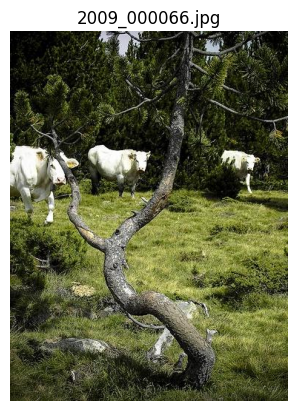

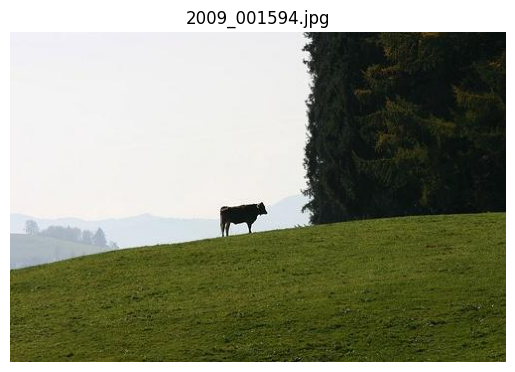

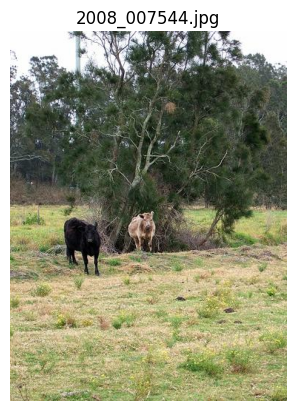

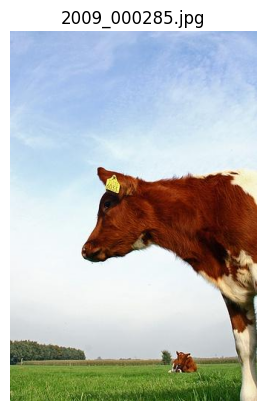

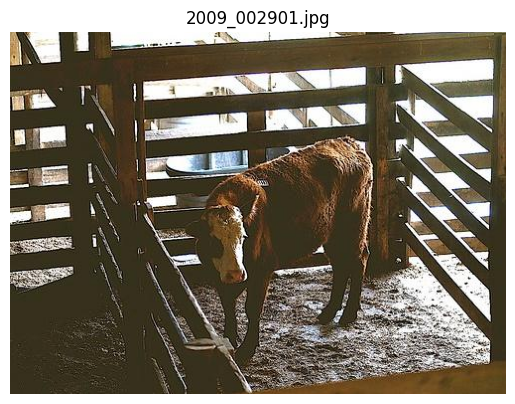

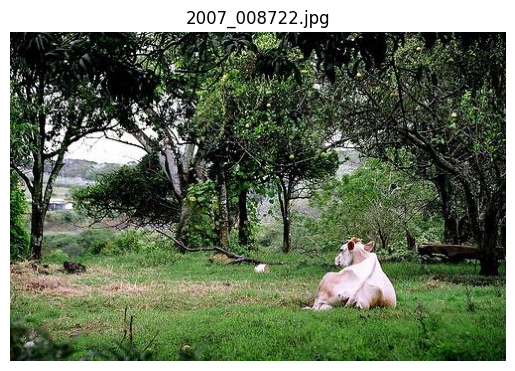

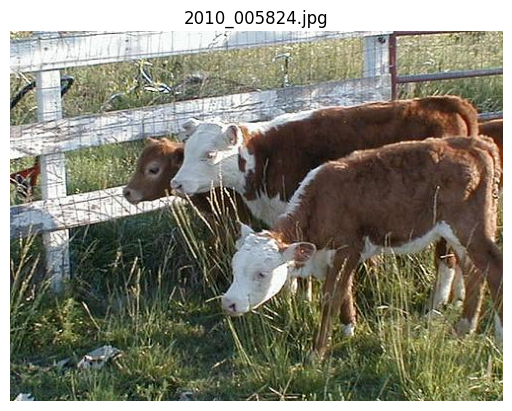

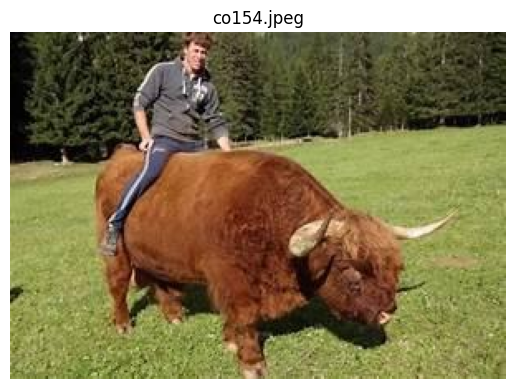

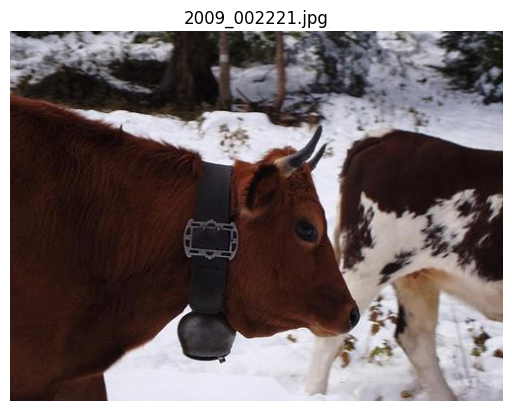

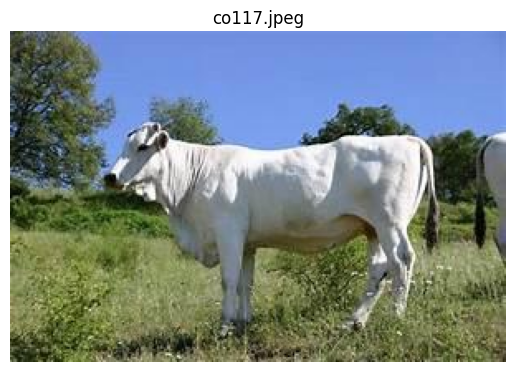

In [12]:
def display_some_images_from_folder(output_path, num_images):
    displayed_images = 0
    for filename in os.listdir(output_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')) and displayed_images < num_images:
            image_filepath = os.path.join(output_path, filename)
            img = mpimg.imread(image_filepath)
            plt.imshow(img)
            plt.title(filename)
            plt.axis('off')
            plt.show()
            displayed_images += 1
        if displayed_images >= num_images:
            break

num_images_to_display = 10
display_some_images_from_folder(output_path, num_images_to_display)


dict_keys(['images', 'annotations', 'categories', 'info'])
{'image_id': 630456, 'bbox': [115, 23, 427, 375], 'keypoints': [[0, 0, 0], [421, 235, 1], [420, 296, 1], [0, 0, 0], [418, 193, 1], [263, 206, 1], [331, 180, 1], [0, 0, 0], [210, 182, 1], [250, 262, 1], [327, 252, 1], [157, 285, 1], [178, 284, 1], [249, 356, 1], [341, 325, 1], [182, 368, 1], [0, 0, 0], [366, 193, 1], [277, 52, 1], [166, 53, 1]], 'num_keypoints': 20, 'category_id': 4}
{'image_id': 926297, 'bbox': [13, 6, 291, 276], 'keypoints': [[184, 116, 1], [79, 92, 1], [91, 186, 1], [246, 81, 1], [64, 35, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], 'num_keypoints': 20, 'category_id': 1}
{'image_id': 275740, 'bbox': [108, 114, 494, 389], 'keypoints': [[183, 210, 1], [114, 209, 1], [125, 297, 1], [194, 167, 1], [132, 166, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0

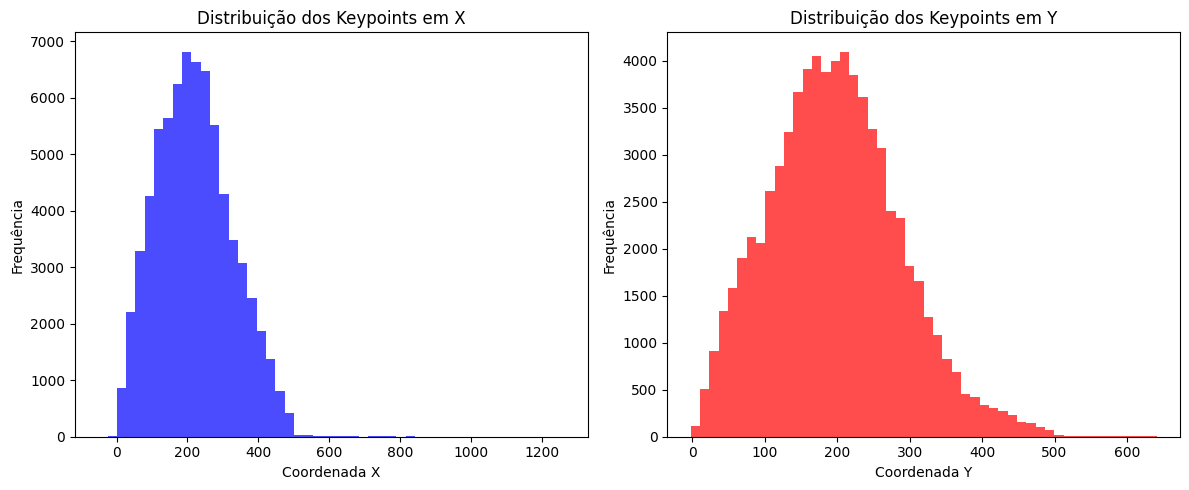

In [13]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

with open(annotations_file, 'r') as f:
    annotations_data = json.load(f)

print(annotations_data.keys())
random_annotations = random.sample(annotations_data['annotations'], 5)

random_annotations_with_new_ids = []
for annotation in random_annotations:
    new_annotation = annotation.copy()
    new_annotation['image_id'] = random.randint(1, 1000000)
    random_annotations_with_new_ids.append(new_annotation)

for annotation in random_annotations_with_new_ids:
    print(annotation)

def plot_image_with_keypoints(output_path, keypoints):
    try:
        image = Image.open(output_path).convert('RGB')
        plt.imshow(image)
        keypoints = np.array(keypoints).reshape(-1, 3)
        visible_keypoints = keypoints[keypoints[:, 2] > 0]
        plt.scatter(visible_keypoints[:, 0], visible_keypoints[:, 1], c='r', marker='.')
        plt.show()
    except FileNotFoundError:
        print(f"Image not found: {output_path}")

for annotation in random_annotations_with_new_ids:
    image_id = annotation['image_id']
    output_path = f'path_to_images/{image_id}.jpg'
    keypoints = annotation['keypoints']
    plot_image_with_keypoints(output_path, keypoints)

all_keypoints = [annotation['keypoints'] for annotation in annotations_data['annotations']]
all_keypoints = np.array(all_keypoints).reshape(-1, 3)

visible_keypoints = all_keypoints[all_keypoints[:, 2] > 0]

mean_x = np.mean(visible_keypoints[:, 0])
mean_y = np.mean(visible_keypoints[:, 1])
std_x = np.std(visible_keypoints[:, 0])
std_y = np.std(visible_keypoints[:, 1])

print(f"Média dos keypoints em X: {mean_x:.2f}, Desvio padrão: {std_x:.2f}")
print(f"Média dos keypoints em Y: {mean_y:.2f}, Desvio padrão: {std_y:.2f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(visible_keypoints[:, 0], bins=50, color='b', alpha=0.7)
plt.title('Distribuição dos Keypoints em X')
plt.xlabel('Coordenada X')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(visible_keypoints[:, 1], bins=50, color='r', alpha=0.7)
plt.title('Distribuição dos Keypoints em Y')
plt.xlabel('Coordenada Y')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


## All images





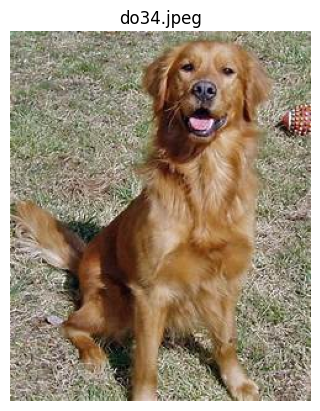

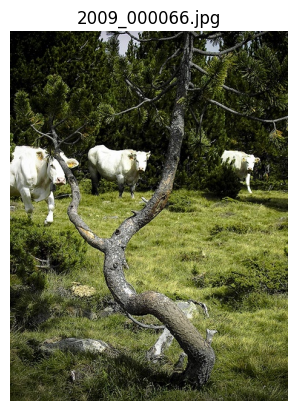

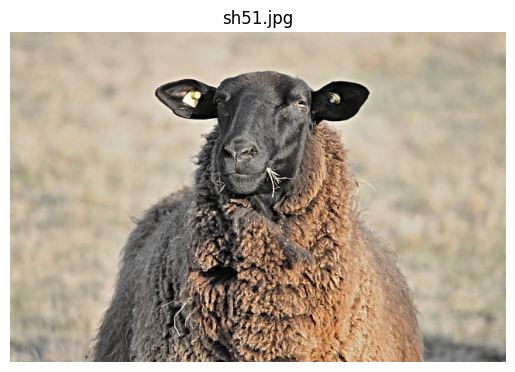

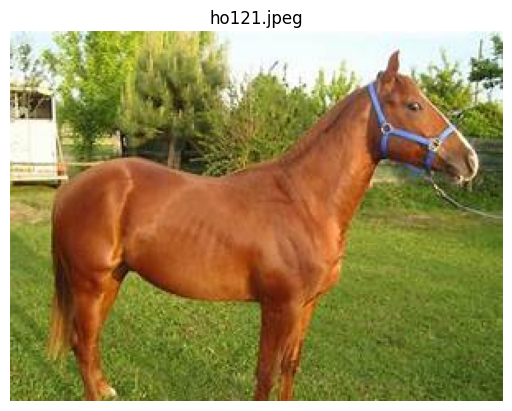

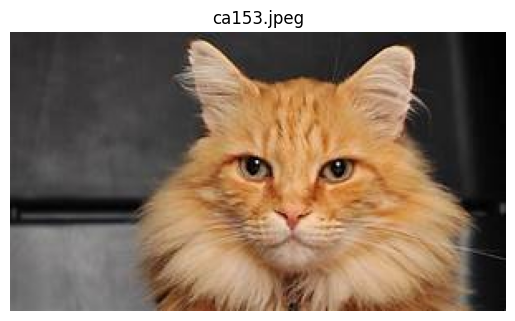

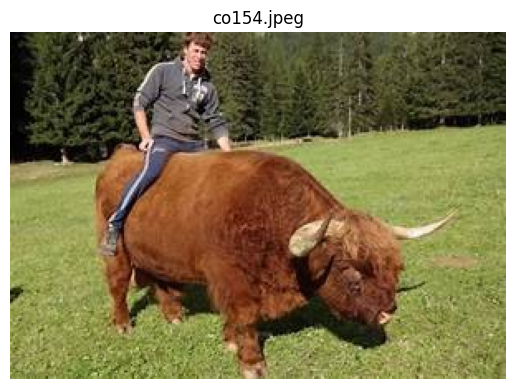

In [14]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

caminho_pasta = '/content/images/images'

imagens_unicas = {}

for arquivo in os.listdir(caminho_pasta):
    if arquivo.endswith(('.png', '.jpg', '.jpeg')):
        tipo_imagem = arquivo[:2]
        if tipo_imagem not in imagens_unicas:
            imagens_unicas[tipo_imagem] = arquivo

for tipo, arquivo in imagens_unicas.items():
    img_path = os.path.join(caminho_pasta, arquivo)
    img = mpimg.imread(img_path)
    plt.figure()
    plt.imshow(img)
    plt.title(arquivo)
    plt.axis('off')
    plt.show()

### Image from process

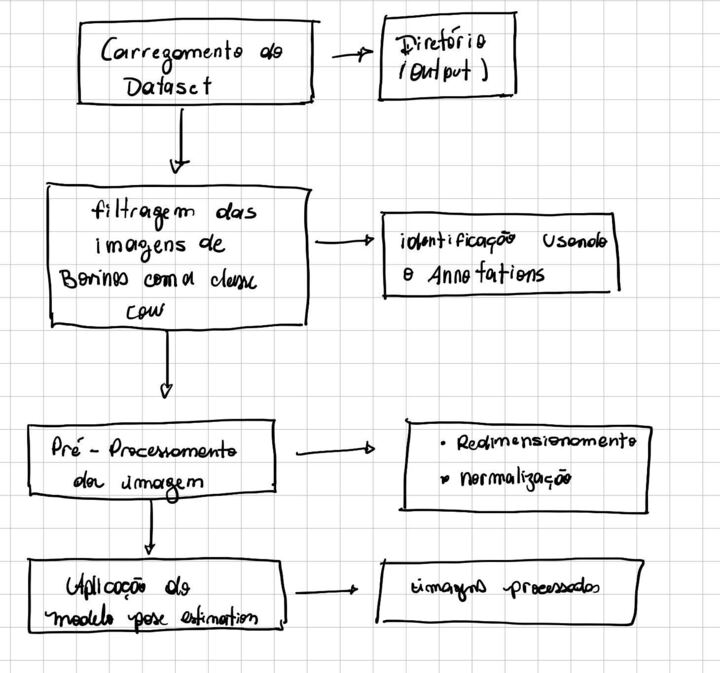

## Pose estimation apply

```
# Isto está formatado como código
```



In [15]:
pip install deeplabcut

In [16]:
!apt-get update
!apt-get install -y libsm6 libxext6 libxrender-dev

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [53.5 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,089 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,889 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:13 https://ppa.launchpadcon

In [18]:
!pip install tensorpack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 kB 6.2 MB/s eta 0:00:00


In [19]:
import deeplabcut

# Defina os parâmetros do seu projeto
project_name = 'CowPose'
experimenter = 'CownBovine'
images_path = '/content/images/output'

# Crie o projeto
deeplabcut.create_new_project(project_name, experimenter, [images_path], copy_videos=True)


Loading DLC 2.3.10...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
Created "/content/CowPose-CownBovine-2024-06-11/videos"
Created "/content/CowPose-CownBovine-2024-06-11/labeled-data"
Created "/content/CowPose-CownBovine-2024-06-11/training-datasets"
Created "/content/CowPose-CownBovine-2024-06-11/dlc-models"
534  videos from the directory /content/images/output were added to the project.
Copying the videos
/content/CowPose-CownBovine-2024-06-11/videos/2009_000066.jpg
/content/CowPose-CownBovine-2024-06-11/videos/2009_001594.jpg
/content/CowPose-CownBovine-2024-06-11/videos/2008_007544.jpg
/content/CowPose-CownBovine-2024-06-11/videos/2009_000285.jpg
/content/CowPose-CownBovine-2024-06-11/videos/2009_002901.jpg
/content/CowPose-CownBovine-2024-06-11/videos/2007_008722.jpg
/content/CowPose-CownBovine-2024-06-11/videos/2010_005824.jpg
/content/CowPose-CownBovine-2024-06-11/videos/co154.jpeg
/content/CowPose-CownBovine-2024-06-11/videos/2009_

'/content/CowPose-CownBovine-2024-06-11/config.yaml'

In [21]:
# Crie os dados para treinamento
deeplabcut.create_training_dataset(path_config_file)

# Treine a rede neural
deeplabcut.train_network(path_config_file, displayiters=200, saveiters=2000, maxiters=50000)

FileNotFoundError: Config file is not found. Please make sure that the file exists and/or that you passed the path of the config file correctly!

In [ ]:
deeplabcut.evaluate_network(path_config_file, plotting=True)
